# Airbnb Property Listing - Regression Modelling with Numerical Data

## Library Imports

In [161]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import data_cleaning

from sklearn.model_selection import train_test_split, KFold, ParameterGrid, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

import joblib

## Import Data

In [2]:
with ZipFile('./airbnb-property-listings.zip') as myzip:
    data = myzip.open("AirbnbDataSci/tabular_data/AirBnbData.csv")

data_df = pd.read_csv(data)
cleaned_data_df = data_df.pipe(data_cleaning.clean_tabular_data)
cleaned_data_df.head()

,id,category,title,description,amenities,location,guests,beds,bathrooms,price_night,cleanliness_rate,accuracy_rate,communication_rate,location_rate,check-in_rate,value_rate,amenities_count,url,bedrooms
0,f9dcbd09-32ac-41d9-a0b1-fdb2793378cf,Treehouses,Red Kite Tree Tent - Ynys Affalon,Escape to one of these two fabulous Tree Tents...,"['What this place offers', 'Bathroom', 'Shampo...",Llandrindod Wells United Kingdom,2.0,1.0,1.0,105.0,4.6,4.7,4.3,5.0,4.3,4.3,13.0,https://www.airbnb.co.uk/rooms/26620994?adults...,1.0
1,1b4736a7-e73e-45bc-a9b5-d3e7fcf652fd,Treehouses,Az Alom Cabin - Treehouse Tree to Nature Cabin,Come and spend a romantic stay with a couple o...,"['What this place offers', 'Bedroom and laundr...",Guyonvelle Grand Est France,3.0,3.0,0.0,92.0,4.3,4.7,4.6,4.9,4.7,4.5,8.0,https://www.airbnb.co.uk/rooms/27055498?adults...,1.0
2,d577bc30-2222-4bef-a35e-a9825642aec4,Treehouses,Cabane Entre Les Pins\n🌲🏕️🌲,"Rustic cabin between the pines, 3 meters high ...","['What this place offers', 'Scenic views', 'Ga...",Duclair Normandie France,4.0,2.0,1.5,52.0,4.2,4.6,4.8,4.8,4.8,4.7,51.0,https://www.airbnb.co.uk/rooms/51427108?adults...,1.0
3,ca9cbfd4-7798-4e8d-8c17-d5a64fba0abc,Treehouses,Tree Top Cabin with log burner & private hot tub,The Tree top cabin is situated in our peaceful...,"['What this place offers', 'Bathroom', 'Hot wa...",Barmouth Wales United Kingdom,2.0,1.0,1.0,132.0,4.8,4.9,4.9,4.9,5.0,4.6,23.0,https://www.airbnb.co.uk/rooms/49543851?adults...,1.0
5,cfe479b9-c8f8-44af-9bc6-46ede9f14bb5,Treehouses,Treehouse near Paris Disney,"Charming cabin nestled in the leaves, real unu...","['What this place offers', 'Bathroom', 'Hair d...",Le Plessis-Feu-Aussoux Île-de-France France,4.0,3.0,1.0,143.0,5.0,4.9,5.0,4.7,5.0,4.7,32.0,https://www.airbnb.co.uk/rooms/935398?adults=1...,2.0


In [3]:
cleaned_data_df.isna().sum().sum()

0

## Baseline Model

In [4]:
X = cleaned_data_df.select_dtypes('number').drop(columns = 'price_night')
y = cleaned_data_df.price_night

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression with No Scaling

In [17]:
X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train_train, y_train_train)
linear_regression_rms = np.sqrt(mean_squared_error(y_valid, linear_regression.predict(X_valid)))
linear_regression_rms

115.6361992867389

### Linear Regression with Standard Scaler

In [18]:
std_scaler = StandardScaler()
X_train_train_std_scale = std_scaler.fit_transform(X_train_train)
linear_regression_std_scale = LinearRegression()
linear_regression_std_scale.fit(X_train_train_std_scale, y_train_train)
linear_regression_std_scale_rms = np.sqrt(mean_squared_error(y_valid, linear_regression_std_scale.predict(std_scaler.transform(X_valid))))
linear_regression_std_scale_rms

115.63619928673882

### Linear Regression with Min-Max Scaler

In [19]:
min_max_scaler = MinMaxScaler()
X_train_train_min_max_scale = min_max_scaler.fit_transform(X_train_train)
linear_regression_min_max_scale = LinearRegression()
linear_regression_min_max_scale.fit(X_train_train_min_max_scale, y_train_train)
linear_regression_min_max_scale_rms = np.sqrt(mean_squared_error(y_valid, linear_regression_min_max_scale.predict(min_max_scaler.transform(X_valid))))
linear_regression_min_max_scale_rms

115.63619928673882

### SGD Regressor with No Scaling

In [24]:
sgd_regression = SGDRegressor(random_state=42)
sgd_regression.fit(X_train_train, y_train_train)
sgd_regression_rms = np.sqrt(mean_squared_error(y_valid, sgd_regression.predict(X_valid)))
sgd_regression_rms

1413403707.939048

### SGD Regressor with Standard Scaler

In [25]:
std_scaler = StandardScaler()
X_train_train_std_scale = std_scaler.fit_transform(X_train_train)
sgd_regression_std_scale = SGDRegressor(random_state=42)
sgd_regression_std_scale.fit(X_train_train_std_scale, y_train_train)
sgd_regression_std_scale_rms = np.sqrt(mean_squared_error(y_valid, sgd_regression_std_scale.predict(std_scaler.transform(X_valid))))
sgd_regression_std_scale_rms

115.37958520095476

### SGD Regressor with Min-Max Scaler

In [26]:
min_max_scaler = MinMaxScaler()
X_train_train_min_max_scale = min_max_scaler.fit_transform(X_train_train)
sgd_regression_min_max_scale = SGDRegressor(random_state=42)
sgd_regression_min_max_scale.fit(X_train_train_min_max_scale, y_train_train)
sgd_regression_min_max_scale_rms = np.sqrt(mean_squared_error(y_valid, sgd_regression_min_max_scale.predict(min_max_scaler.transform(X_valid))))
sgd_regression_min_max_scale_rms

124.49525937013341

So the best baseline RMS is with SGD Regressor and Standard Scaler and a score of 115.38.

In [29]:
sgd_regression_std_scale_train_mse = np.sqrt(mean_squared_error(y_train_train, sgd_regression_std_scale.predict(std_scaler.fit_transform(X_train_train))))
sgd_regression_std_scale_train_mse

94.30694156849837

So the best model so far is over-fitting.

## Generate a custom hyper-parameter tuning function

In [82]:
def tune_regression_model_parameters(reg_mdl, X, y, params=None, cv=5):
    
    
    if params is not None:
        params_grid = list(ParameterGrid(params))
        mean_train_rms = []
        mean_valid_rms =[]
        for params_i in params_grid:
            reg_mdl_instance = reg_mdl(**params_i)

            kf = KFold(n_splits=cv)

            train_rms = []
            valid_rms = []

            for train_index, test_index in kf.split(X):
                X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
                y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
                reg_mdl_instance.fit(X_train, y_train)
                train_rms.append(np.sqrt(mean_squared_error(y_train, reg_mdl_instance.predict(X_train))))
                valid_rms.append(np.sqrt(mean_squared_error(y_valid, reg_mdl_instance.predict(X_valid))))
            
            mean_train_rms.append(np.mean(train_rms))
            mean_valid_rms.append(np.mean(valid_rms))
        
        best_valid_i = np.argmin(mean_valid_rms)
        best_valid_score = np.min(mean_valid_rms)
        best_params = params_grid[best_valid_i]
        train_score = mean_train_rms[best_valid_i]
        
        out = {'best_valid_score': best_valid_score, 'best_params': best_params, 'train_score': train_score,
                'mean_train_rms': mean_train_rms, 'mean_valid_rms': mean_valid_rms}
        
        return out
    
    else:
        reg_mdl_instance = reg_mdl()
        kf = KFold(n_splits=cv)

        train_rms = []
        valid_rms = []

        for train_index, test_index in kf.split(X):
            X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
            y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
            reg_mdl_instance.fit(X_train, y_train)
            train_rms.append(np.sqrt(mean_squared_error(y_train, reg_mdl_instance.predict(X_train))))
            valid_rms.append(np.sqrt(mean_squared_error(y_valid, reg_mdl_instance.predict(X_valid))))
        
        train_score = np.mean(train_rms)
        valid_score = np.mean(valid_rms)

        out = {'train_score': train_score, 'valid_score': valid_score, 'params': reg_mdl_instance.get_params()}
        
        return out

In [85]:
results_tune = tune_regression_model_parameters(Ridge, X_train, y_train, params={'alpha': [0.01, 0.1, 1, 10, 100]})
results_default = tune_regression_model_parameters(Ridge, X_train, y_train)

In [86]:
results_tune

{'best_valid_score': 100.25919500675414,
 'best_params': {'alpha': 0.01},
 'train_score': 97.85519055535443,
 'mean_train_rms': [97.85519055535443,
  97.85967426865321,
  98.09682836868338,
  100.54386955052546,
  104.03603179726142],
 'mean_valid_rms': [100.25919500675414,
  100.27336296635698,
  100.57578853528602,
  102.89852359083041,
  105.43178768907701]}

In [87]:
results_default

{'train_score': 98.09682836868338,
 'valid_score': 100.57578853528602,
 'params': {'alpha': 1.0,
  'copy_X': True,
  'fit_intercept': True,
  'max_iter': None,
  'normalize': 'deprecated',
  'positive': False,
  'random_state': None,
  'solver': 'auto',
  'tol': 0.001}}

## Use sklearn hyper-parameter tuning tools

In [95]:
ridge_clf = RidgeCV(alphas=(1e-4, 1e-3, 0.01, 0.1, 1, 10), cv=5, scoring = 'neg_root_mean_squared_error')
ridge_clf.fit(X_train, y_train)

RidgeCV(alphas=(0.0001, 0.001, 0.01, 0.1, 1, 10), cv=5,
        scoring='neg_root_mean_squared_error')

In [96]:
ridge_clf.alpha_

0.0001

In [119]:
pipe_ridge_cv_std_scaler = Pipeline([('scaler',  StandardScaler()),
            ('ridge', Ridge())])
grid_params_ridge = {'ridge__alpha': [1e-1, 1, 10, 1e2]}
cv_ridge_std_scaler = GridSearchCV(estimator = pipe_ridge_cv_std_scaler,
                               param_grid = grid_params_ridge,
                               cv = 5, return_train_score=True, scoring='neg_root_mean_squared_error')
cv_ridge_std_scaler.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1, 10, 100.0]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [120]:
cv_ridge_std_scaler.best_params_, cv_ridge_std_scaler.best_score_, cv_ridge_std_scaler.cv_results_['mean_train_score']

({'ridge__alpha': 10},
 -100.17009185736416,
 array([-97.85514567, -97.85557098, -97.8910553 , -99.06579141]))

In [151]:
std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train)
ridge_alpha = Ridge(alpha=10)
ridge_alpha.fit(X_train_std_scaled, y_train)

Ridge(alpha=10)

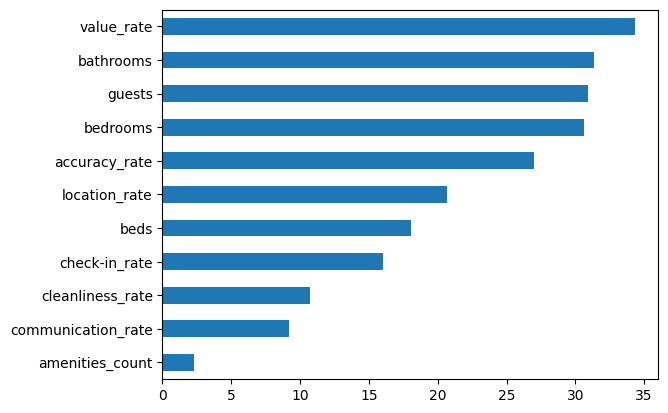

In [155]:
coefs_df = pd.Series(abs(ridge_alpha.coef_), index = X_train.columns).sort_values().plot.barh()

In [126]:
pipe_lasso_cv_std_scaler = Pipeline([('scaler',  StandardScaler()),
            ('lasso', Lasso())])
grid_params_lasso = {'lasso__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2]}
cv_lasso_std_scaler = GridSearchCV(estimator = pipe_lasso_cv_std_scaler,
                               param_grid = grid_params_lasso,
                               cv = 5, return_train_score=True, scoring='neg_root_mean_squared_error')
cv_lasso_std_scaler.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100.0]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [160]:
cv_lasso_std_scaler.best_params_, cv_lasso_std_scaler.best_score_, cv_lasso_std_scaler.cv_results_['mean_train_score'], cv_lasso_std_scaler.cv_results_['mean_test_score']

({'lasso__alpha': 1e-05},
 -100.25804553994621,
 array([ -97.85514129,  -97.85514129,  -97.85514149,  -97.85516163,
         -97.8571559 ,  -98.05331773, -102.93573927, -126.09775924]),
 array([-100.25804554, -100.25805933, -100.25819739, -100.25956897,
        -100.27533288, -100.60668354, -104.62060597, -124.7765663 ]))

Linear models aren't really working that well

In [129]:
rf_reg = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [10, 50, 100, 200, 500],
                'criterion' : ['squared_error', 'absolute_error'],
                'max_depth': [3,5,7,9,11,15],
                'min_samples_split': [2,5,10,20]
}

cv_rf_reg = GridSearchCV(rf_reg, rf_params,
                        cv = 5, return_train_score=True, scoring='neg_root_mean_squared_error')
cv_rf_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11, 15],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200, 500]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [143]:
cv_rf_reg.best_score_, cv_rf_reg.best_params_, cv_rf_reg.cv_results_['mean_train_score'][59]

(-100.08504463930558,
 {'criterion': 'squared_error',
  'max_depth': 7,
  'min_samples_split': 20,
  'n_estimators': 500},
 -83.13895001291914)

Ok, so this is probably the best model so far, but it is still over-fitting.

In [158]:
final_rf_reg = RandomForestRegressor(random_state=42, **cv_rf_reg.best_params_)
final_rf_reg.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_train, final_rf_reg.predict(X_train)))

82.32167410183622

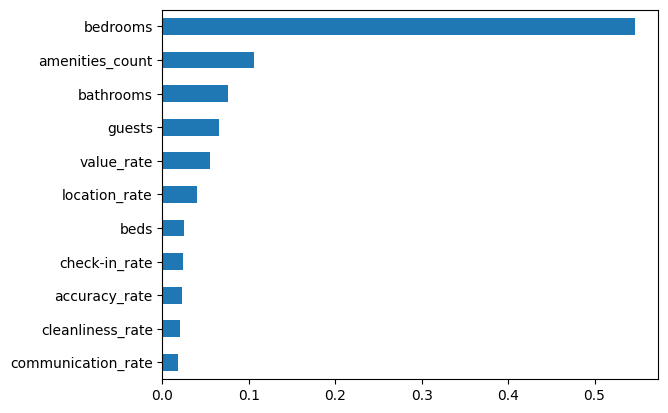

In [159]:
feature_importances_df = pd.Series(final_rf_reg.feature_importances_, index=X_train.columns)
feature_importances_df.sort_values().plot.barh();

In [162]:
# save regression model
joblib.dump(final_rf_reg, 'random_forest_regression_model.pkl')

['random_forest_regression_model.pkl']